## Welcome to TINDER ANALYTICS Jupyter Play Book

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import string
import re

In [3]:
LATIN_1_CHARS = (
    ('\xe2\x80\x99', "'"),
    ('\xc3\xa9', 'e'),
    ('\xe2\x80\x90', '-'),
    ('\xe2\x80\x91', '-'),
    ('\xe2\x80\x92', '-'),
    ('\xe2\x80\x93', '-'),
    ('\xe2\x80\x94', '-'),
    ('\xe2\x80\x94', '-'),
    ('\xe2\x80\x98', "'"),
    ('\xe2\x80\x9b', "'"),
    ('\xe2\x80\x9c', '"'),
    ('\xe2\x80\x9c', '"'),
    ('\xe2\x80\x9d', '"'),
    ('\xe2\x80\x9e', '"'),
    ('\xe2\x80\x9f', '"'),
    ('\xe2\x80\xa6', '...'),
    ('\xe2\x80\xb2', "'"),
    ('\xe2\x80\xb3', "'"),
    ('\xe2\x80\xb4', "'"),
    ('\xe2\x80\xb5', "'"),
    ('\xe2\x80\xb6', "'"),
    ('\xe2\x80\xb7', "'"),
    ('\xe2\x81\xba', "+"),
    ('\xe2\x81\xbb', "-"),
    ('\xe2\x81\xbc', "="),
    ('\xe2\x81\xbd', "("),
    ('\xe2\x81\xbe', ")")
)

def clean_latin1(data):
    try:
        return data.encode('utf-8')
    except UnicodeDecodeError:
        for _hex, _char in LATIN_1_CHARS:
            data = data.replace(_hex, _char)
        return data

In [30]:
def remove_emoji(text_ls):
    rgx = re.compile('[^' + ''.join(string.printable) + ']')
    temp_ls = list()
    for i in text_ls:
        temp_ls.append(rgx.sub('', i))
    return temp_ls

def remove_junk_char(text_ls):
    temp_ls = list()
    for i in text_ls:
        text = clean_latin1(i).decode("utf-8") 
        temp_ls.append(text)
    return temp_ls

def main_clean_txt(df, gender = None):
    df = df.dropna()
    if not gender is None:
        df = df[df.gender == gender]
    text_ls = df['bio']
    txt_no_emoji = remove_emoji(text_ls)
    txt_clean = remove_junk_char(txt_no_emoji)
    paragraph = ' '.join(txt_clean)
    paragraph = paragraph.replace('Im', '') #too many 'Im's
    return paragraph

def make_word_cloud(text):
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

In [33]:
df = pd.read_csv('/users/tinnaing/desktop/pro/tinder-fun/tinder_df.csv')
para = main_clean_txt(df)
para_female = main_clean_txt(df, 1)
para_male = main_clean_txt(df, 0)

In [ ]:
#run the cell below to save clean text in txt file
file = open('/users/tinnaing/desktop/pro/tinder-fun/paragraph.txt', 'w') 
file.write(para)
file.close()

In [ ]:
#open saved text file
para = open('/users/tinnaing/desktop/pro/tinder-fun/paragraph.txt','r')
para = para.read()

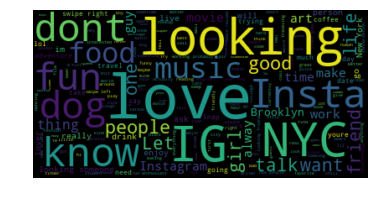

In [34]:
make_word_cloud(para)

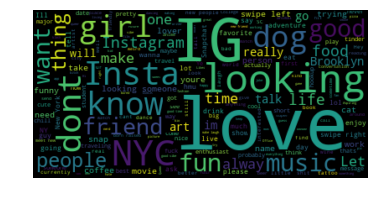

In [35]:
make_word_cloud(para_female)

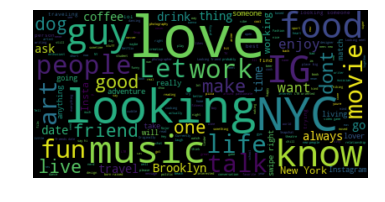

In [36]:
make_word_cloud(para_male)